<a href="https://colab.research.google.com/github/euxenus/Tumor-Detection/blob/main/Brain_seg_dt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive Bağlantısı

In [ ]:
from google.colab import drive  # Drive bağlantısı
drive.mount('/content/drive')

Mounted at /content/drive


Detectron2 Kurulumu

*   Liste öğesi

*   Liste öğesi

*   Liste öğesi

*   Liste öğesi
*   Liste öğesi


*   Liste öğesi


*   Liste öğesi


*   Liste öğesi



In [ ]:
# Detectron2 Kurulumu için tüm fonksiyonları yüklemeden hızlı kurulum sağlar.
!python -m pip install pyyaml #==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Detectron2 kurulumu.
# !git clone https://github.com/facebookresearch/detectron2.git
# !python -m pip install -e detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 15354, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 15354 (delta 27), reused 32 (delta 10), pack-reused 15275
Receiving objects: 100% (15354/15354), 6.23 MiB | 18.77 MiB/s, done.
Resolving deltas: 100% (11142/11142), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=70420f44fd900ca7a1c5ee0ab58d426ae6870ee58aa9be9995d91b0ff18b739b


Versiyon Kontrolleri

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.1 ; cuda:  cu121
detectron2: 0.6


Gerekli Kütüphanelerin İmport Edilmesi

In [ ]:
# Detectron2 logger kurulumu.
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Kütüphanelerin kurulumu
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# Gerekli Detectron2 utilities (araçlar) kurulumu.
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

Dataset'i Modele Tanımlamak İçin Register İşlemi  

In [ ]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances("my_dataset_train", {}, "/content/drive/MyDrive/proje/Brain_Custom_Dataset_1/Brain_Custom_Dataset/TRAIN/labels_my-project-name_2023-12-15-10-13-36.json", "/content/drive/MyDrive/proje/Brain_Custom_Dataset_1/Brain_Custom_Dataset/TRAIN")
register_coco_instances("my_dataset_val", {}, "/content/drive/MyDrive/proje/Brain_Custom_Dataset_1/Brain_Custom_Dataset/VALID/labels_my-project-name_2023-12-14-01-55-17.json", "/content/drive/MyDrive/proje/Brain_Custom_Dataset_1/Brain_Custom_Dataset/VALID")

# Data yolunu ve annotations.json dosyası yolunu yukarıdaki koda ver.

*   Train Ve Validation Datasetleri İçin Metadata Ve Dataset Dictionaries'leri Çıkarma.

*  Register İşleminin Doğru Çalıştığını Görme.



In [ ]:
train_metadata = MetadataCatalog.get("my_dataset_train")
train_dataset_dicts = DatasetCatalog.get("my_dataset_train")

[02/05 08:34:48 d2.data.datasets.coco]: Loading /content/drive/MyDrive/proje/Brain_Custom_Dataset_1/Brain_Custom_Dataset/TRAIN/labels_my-project-name_2023-12-15-10-13-36.json takes 3.06 seconds.
[02/05 08:34:48 d2.data.datasets.coco]: Loaded 464 images in COCO format from /content/drive/MyDrive/proje/Brain_Custom_Dataset_1/Brain_Custom_Dataset/TRAIN/labels_my-project-name_2023-12-15-10-13-36.json


In [ ]:
val_metadata = MetadataCatalog.get("my_dataset_val")
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

[02/05 08:34:54 d2.data.datasets.coco]: Loaded 70 images in COCO format from /content/drive/MyDrive/proje/Brain_Custom_Dataset_1/Brain_Custom_Dataset/VALID/labels_my-project-name_2023-12-14-01-55-17.json


Random Bazı Örnekleri Görselleştirme.

In [ ]:
from matplotlib import pyplot as plt

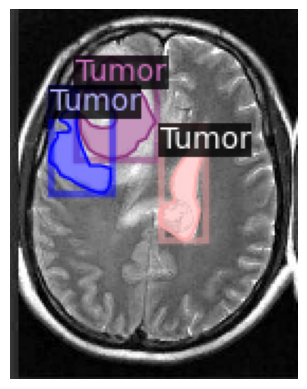

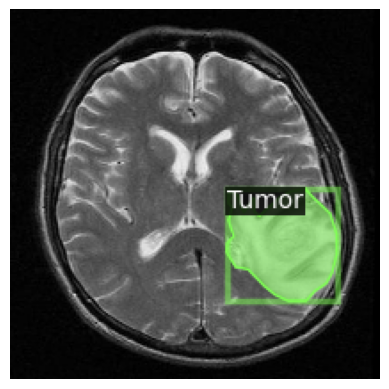

In [ ]:
for d in random.sample(train_dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.axis(False)
    plt.show()

    # Train datasetinden 2 örnek göster. Validation dataseti görselleştirmek için metadata'yı ayarla.
    # Annotations dosyan ile data'nın uyuştuğunu gösterir.

## **TRAIN**

Model İçin Bir Config Dosyası Oluşturma.

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg() # Cfg isimli bir configration tanımla.
cfg.OUTPUT_DIR = "/content/drive/MyDrive/proje/output" # Output yolu / Kaydedilecek yer.
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")) # Kullanacağın ağırlıkları seç.
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = () # Validation dataseti ekleyebilirsin.
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Bu ağırlık paremetrelerini kullanarak eğitime başla.
cfg.SOLVER.IMS_PER_BATCH = 4  # Batch size
cfg.SOLVER.BASE_LR = 0.0001  # Learning_rate
cfg.SOLVER.MAX_ITER = 5    # İterasyon sayısı
cfg.SOLVER.STEPS = []        # Öğrenme oranının sabit kalması
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) # Verilen özelliklerle bir config dosyası oluştur.
trainer.resume_or_load(resume=False) # Önceden eğitilmiş model varsa yükleyebilirsin.
# '/content/drive/MyDrive/Brain_Seg/mask2former_w/model_final_94dc52.pkl'

[02/05 08:36:04 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:00, 215MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


In [ ]:
#trainer.train() # Train işlemine başla.

Config Dosyasını Kaydet

In [ ]:
import yaml
config_yaml_path = "/content/drive/MyDrive/proje/output/output.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)

# Inference & Evaluation

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.97   # Test için threshold belirle.
predictor = DefaultPredictor(cfg)

[02/05 08:36:36 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/proje/output/model_final.pth ...


Validation Dataset İçinde Random Görüntüleri Segmentasyon Yap

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


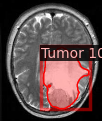

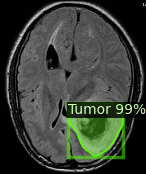

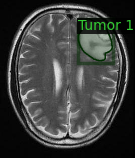

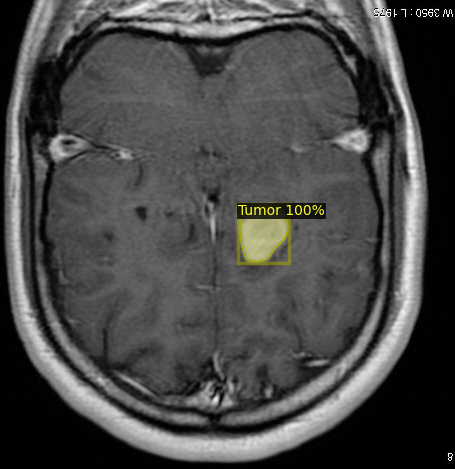

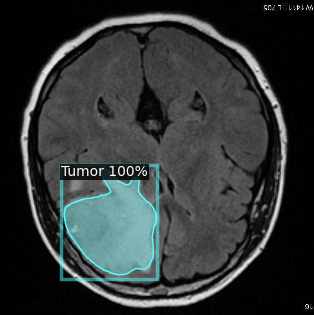

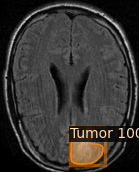

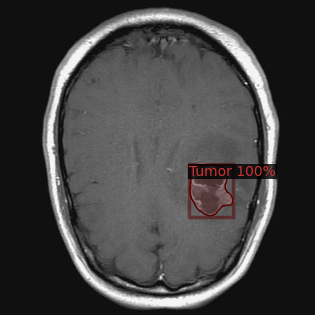

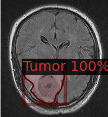

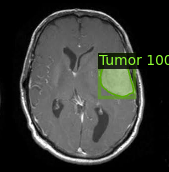

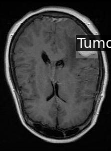

In [ ]:
from detectron2.utils.visualizer import ColorMode
                       #val
for d in random.sample(val_dataset_dicts, 10):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW   # Piksellerin rengini kaldırır.
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

# Validation dataset için 1 görselin segmantosyonunu göster.

**Eğitilen Modelin Metric Değerlerini Göster**

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

# Testset ile de değerlendirme yapılabilir.

[02/05 08:37:02 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
[02/05 08:37:02 d2.data.datasets.coco]: Loaded 70 images in COCO format from /content/drive/MyDrive/proje/Brain_Custom_Dataset_1/Brain_Custom_Dataset/VALID/labels_my-project-name_2023-12-14-01-55-17.json
[02/05 08:37:02 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|   Tumor    | 74           |
|            |              |
[02/05 08:37:02 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/05 08:37:02 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/05 08:37:02 d2.data.common]: Serializing 70 elements to byte tensors and concatenating them all ...
[02/05 08:37:02 d2.data.common]: Serialized dataset takes 0.06 MiB
[02/05 08:37:

Yeni Fotoğraf Yükle Ve Segmentasyon Yap

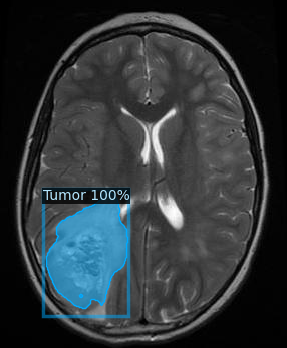

In [ ]:
new_im = cv2.imread("/content/drive/MyDrive/proje/Brain_Custom_Dataset_1/Brain_Custom_Dataset/TEST/y794.jpg")
outputs  = predictor(new_im)

v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2_imshow(out.get_image()[:, :, ::-1])

Bir Klasördeki Birden Fazla Fotoğrafa Segmentastonyon Yapıp Kaydetme

In [ ]:
# Input image klasörünün yolu
input_images_directory = "/content/drive/MyDrive/Brain_segmentation_detectron2/deneme_brain_makesense/test"

# Segmentasyon yapılan görüntülerin nereye kaydedileceği
output_directory = "/content/drive/MyDrive/Brain_segmentation_detectron2/deneme_brain_makesense/test/test_results"


for image_filename in os.listdir(input_images_directory):
    image_path = os.path.join(input_images_directory, image_filename)
    new_im = cv2.imread(image_path)

    # Yeni görüntü üzerinde tahmin yapar.
    outputs = predictor(new_im)

    v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Output directory'e '_result' sonu ile biten fotoğrafları oluşturur.
    result_filename = os.path.splitext(image_filename)[0] + "_result.png"
    output_path = os.path.join(output_directory, result_filename)

    # Segmente edilmiş görüntüyü kaydet.
    cv2.imwrite(output_path, out.get_image()[:, :, ::-1])

print("Tüm Fotoğraflar Başarılı Bir Şekilde Segmente Edildi!")